# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**План работы:**

1. Ознакомление с данными.
2. Предобработка данных.
3. Дополнение таблицы новыми столбцами со следующими параметрами:
        - цена одного квадратного метра;
        - день недели публикации объявления;
        - месяц публикации объявления;
        - год публикации объявления;
        - тип этажа квартиры;
        - расстояние до центра города в километрах.
4. Исследовательский анализ данных.
5. Общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install numexpr 

data = pd.read_csv('C:/datasets/3/real_estate_data.csv', sep='\t')

# Вывожу первые 20 строк датафрейма

data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [138]:
# Смотрю информацию о датафрейме

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

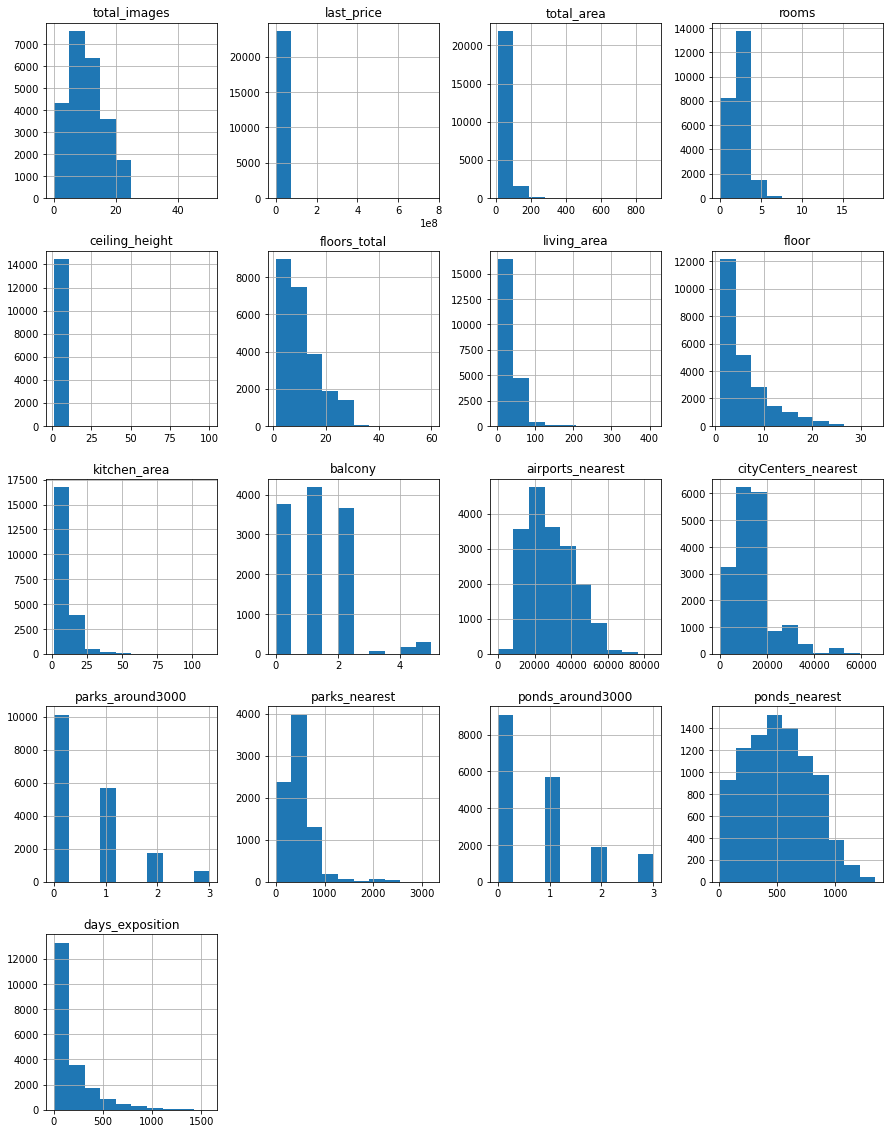

In [139]:
# Строю гистограммы

data.hist(figsize=(15,20));

### Предобработка данных

In [140]:
# Смотрю количество пропусков в разных столбцах.

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [141]:
# Заполняю пропуски в столбце с количеством балконов нулями.

data['balcony'] = data['balcony'].fillna(0)

In [142]:
# Проверяю.

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [143]:
# Заполняю пропуски в столбце с количеством прудов в радиусе 3000 м. нулями, поскольку в данном случае пропуск, скорее всего, означает отсутствие пруда.

data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

In [144]:
# Проверяю.

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [145]:
# Заполняю пропуски в столбце с количеством парков в радиусе 3000 м. нулями, поскольку в данном случае пропуск, скорее всего, означает отсутствие парка.

data['parks_around3000'] = data['parks_around3000'].fillna(0)

In [146]:
# Проверяю.

print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64


<b>Причины, которые могли привести к пропускам в данных</b>

Скорее всего, пользователи не указали данные в характеристике недвижимости при составлении объявлений, потому что пропуски рассредоточенны неравномерно и их количество совпадает только в графах parks_around3000 и ponds_around3000 - 5518.

In [147]:
# Смотрю, какие типы данных есть в датафрейме.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [148]:
# Перевожу дату в формат datetime.

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [149]:
# Проверяю.

print(data['first_day_exposition'])

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]


<b>2. Дату нужно перевести в формат datetime для дальнейшей работы и исследования данных.</b>


In [150]:
# Вывожу список уникальных названий населенных пунктов

print(data['locality_name'].unique())

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [151]:
# Вручную устраняю неявные дубликаты в названиях населенных пукнтов

data['locality_name'] = data['locality_name'].replace('городской поселок Янино-1' ,'городской посёлок Янино-1')

data['locality_name'] = data['locality_name'].replace('посёлок Мурино' ,'Мурино')
data['locality_name'] = data['locality_name'].replace('поселок Мурино' ,'Мурино')

data['locality_name'] = data['locality_name'].replace('деревня Кудрово' ,'Кудрово')

data['locality_name'] = data['locality_name'].replace(
    'поселок городского типа Красный Бор' ,'посёлок городского типа Красный Бор')

data['locality_name'] = data['locality_name'].replace('поселок городского типа Лебяжье' ,'посёлок городского типа Лебяжье')

data['locality_name'] = data['locality_name'].replace(
    'поселок городского типа Кузьмоловский' ,'посёлок городского типа Кузьмоловский')

data['locality_name'] = data['locality_name'].replace('поселок Аннино' ,'посёлок Аннино')

data['locality_name'] = data['locality_name'].replace('поселок Новый Свет' ,'посёлок Новый Свет')

data['locality_name'] = data['locality_name'].replace('село Никольское' ,'Никольское')

data['locality_name'] = data['locality_name'].replace('поселок Бугры' ,'посёлок Бугры')

data['locality_name'] = data['locality_name'].replace('поселок городского типа Рощино' ,'посёлок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace('городской посёлок Рощино' ,'посёлок городского типа Рощино')

data['locality_name'] = data['locality_name'].replace('поселок Усть-Луга' ,'посёлок Усть-Луга')

data['locality_name'] = data['locality_name'].replace('село Павлово' ,'посёлок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace('городской посёлок Павлово' ,'посёлок городского типа Павлово')

data['locality_name'] = data['locality_name'].replace('поселок Победа' ,'посёлок Победа')

data['locality_name'] = data['locality_name'].replace('поселок Терволово' ,'посёлок Терволово')

data['locality_name'] = data['locality_name'].replace('поселок городского типа Советский' ,'посёлок городского типа Советский')
data['locality_name'] = data['locality_name'].replace('городской посёлок Советский' ,'посёлок городского типа Советский')

data['locality_name'] = data['locality_name'].replace('поселок Петровское' ,'посёлок Петровское')

data['locality_name'] = data['locality_name'].replace('поселок Тельмана' ,'посёлок Тельмана')

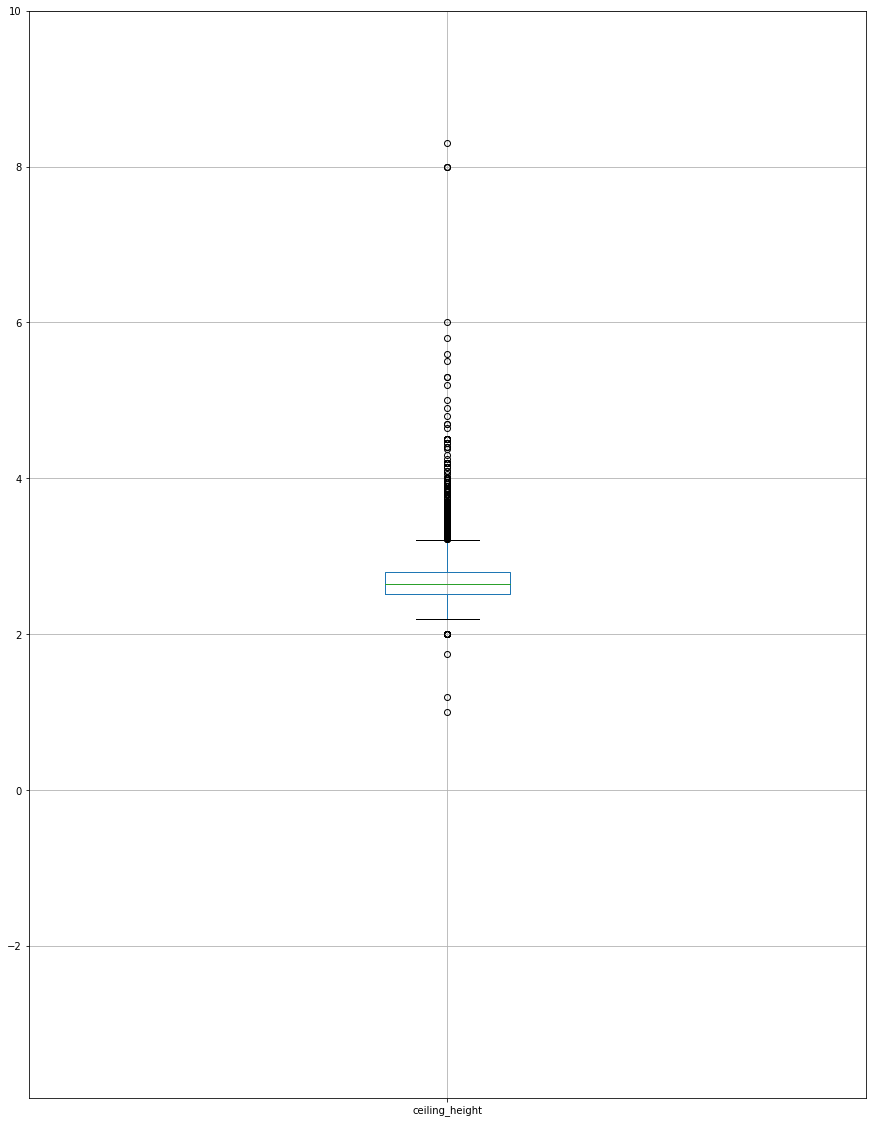

In [152]:
# Строю "ящик с усами" по столбцу с высотой потолков


data.boxplot('ceiling_height', figsize=(15, 20))
plt.ylim(top=10);

In [153]:
# Поиск аномально высоких значений в столбце ceiling_height

print(data['ceiling_height'].sort_values(ascending=False).head(30))

22869    100.0
22336     32.0
3148      32.0
21377     27.5
20478     27.0
5246      27.0
5807      27.0
10773     27.0
17857     27.0
22938     27.0
21824     27.0
4876      27.0
5669      26.0
18545     25.0
11285     25.0
355       25.0
6246      25.0
14382     25.0
4643      25.0
9379      25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
15743      8.0
3474       8.0
17442      8.0
20264      6.0
Name: ceiling_height, dtype: float64


In [154]:
# Поиск аномально низких значений в столбце ceiling_height

print(data['ceiling_height'].sort_values(ascending=True).head(30))

22590    1.00
5712     1.20
16934    1.75
2572     2.00
19329    2.00
11352    2.00
5850     2.00
19098    2.00
16884    2.00
22960    2.00
552      2.00
20520    2.00
16446    2.00
4212     2.00
12755    2.20
17794    2.25
1582     2.30
5498     2.30
17762    2.30
23498    2.30
227      2.34
21349    2.40
10160    2.40
20564    2.40
14463    2.40
15939    2.40
1322     2.40
3633     2.40
13462    2.40
12069    2.40
Name: ceiling_height, dtype: float64


In [155]:
# Заменяю значения высоты потолков.

data['ceiling_height'] = data['ceiling_height'].replace(32.0, 3.2)
data['ceiling_height'] = data['ceiling_height'].replace(27.0, 2.7)
data['ceiling_height'] = data['ceiling_height'].replace(27.5, 2.75)
data['ceiling_height'] = data['ceiling_height'].replace(26.0, 2.6)
data['ceiling_height'] = data['ceiling_height'].replace(25.0, 2.5)
data['ceiling_height'] = data['ceiling_height'].replace(24.0, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(24.0, 2.4)
data['ceiling_height'] = data['ceiling_height'].replace(22.6, 2.26)
data['ceiling_height'] = data['ceiling_height'].replace(20.0, 2.0)

In [156]:
# Отбрасываю слишком высокие и слишком низкие значения

data = data.query('ceiling_height <= 4 & ceiling_height >= 2')

In [157]:
# Проверяю

print(data['ceiling_height'].sort_values(ascending=False))

15528    4.0
6269     4.0
4189     4.0
7618     4.0
9929     4.0
        ... 
20520    2.0
5850     2.0
22960    2.0
2572     2.0
19098    2.0
Name: ceiling_height, Length: 14448, dtype: float64


In [158]:
# Проверка количества отброшенных значений.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14448 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14448 non-null  int64         
 1   last_price            14448 non-null  float64       
 2   total_area            14448 non-null  float64       
 3   first_day_exposition  14448 non-null  datetime64[ns]
 4   rooms                 14448 non-null  int64         
 5   ceiling_height        14448 non-null  float64       
 6   floors_total          14439 non-null  float64       
 7   living_area           13657 non-null  float64       
 8   floor                 14448 non-null  int64         
 9   is_apartment          1852 non-null   object        
 10  studio                14448 non-null  bool          
 11  open_plan             14448 non-null  bool          
 12  kitchen_area          13517 non-null  float64       
 13  balcony         

<AxesSubplot:>

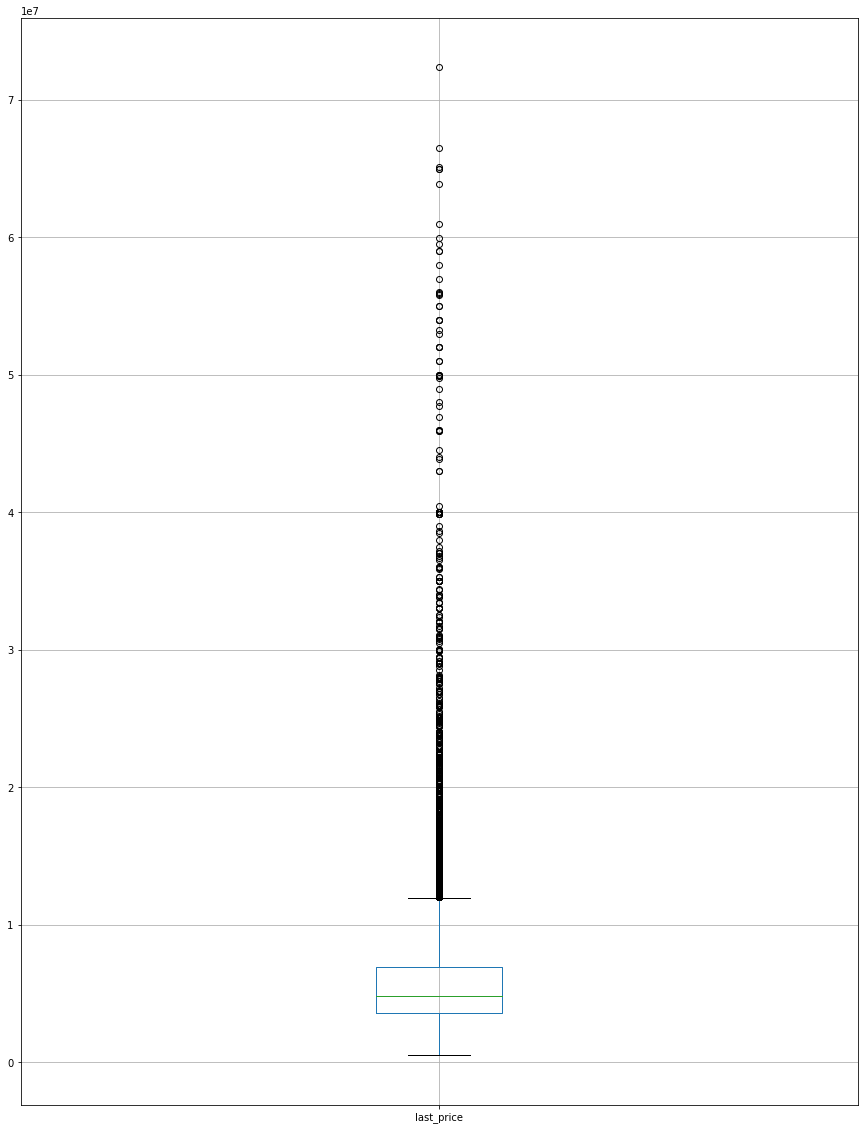

In [225]:
# Ищу аномальные значения в столбце с ценой.

data.boxplot('last_price', figsize=(15,20))


In [161]:
# Ищу аномальные значения.

data['last_price'].describe()

count    1.444800e+04
mean     6.756401e+06
std      9.873689e+06
min      1.219000e+04
25%      3.550000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

In [162]:
# Ищу аномально низкие значения.

print(data['last_price'].sort_values(ascending=True).head(20))

8793      12190.0
16219    450000.0
10782    490000.0
4405     500000.0
1358     550000.0
11351    550000.0
22997    560000.0
19460    560000.0
13809    565000.0
8105     585000.0
22952    600000.0
18841    600000.0
11211    600000.0
21523    600000.0
15548    630000.0
21637    630000.0
11108    630000.0
19926    650000.0
2404     650000.0
5689     650000.0
Name: last_price, dtype: float64


In [163]:
# Ищу аномально высокие значения.

print(data['last_price'].sort_values(ascending=False).head(30))

19540    420000000.0
1436     330000000.0
15651    300000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
19865    180000000.0
2536     159984000.0
15016    150000000.0
12674    140000000.0
12859    140000000.0
793      135000000.0
17912    135000000.0
7674     131000000.0
2243     130278280.0
13864    130000000.0
21955    130000000.0
21023    124350000.0
4996     124000000.0
16647    122000000.0
1188     118000000.0
6621      99000000.0
155       96000000.0
492       95000000.0
11329     95000000.0
15151     88000000.0
5534      87000000.0
12045     86738800.0
11430     85000000.0
10362     83820000.0
Name: last_price, dtype: float64


In [164]:
# Отбрасываю неправдоподобно высокие и низкие значения.

data = data.query('last_price <= 73000000.0 & last_price >= 450000.0')

<AxesSubplot:>

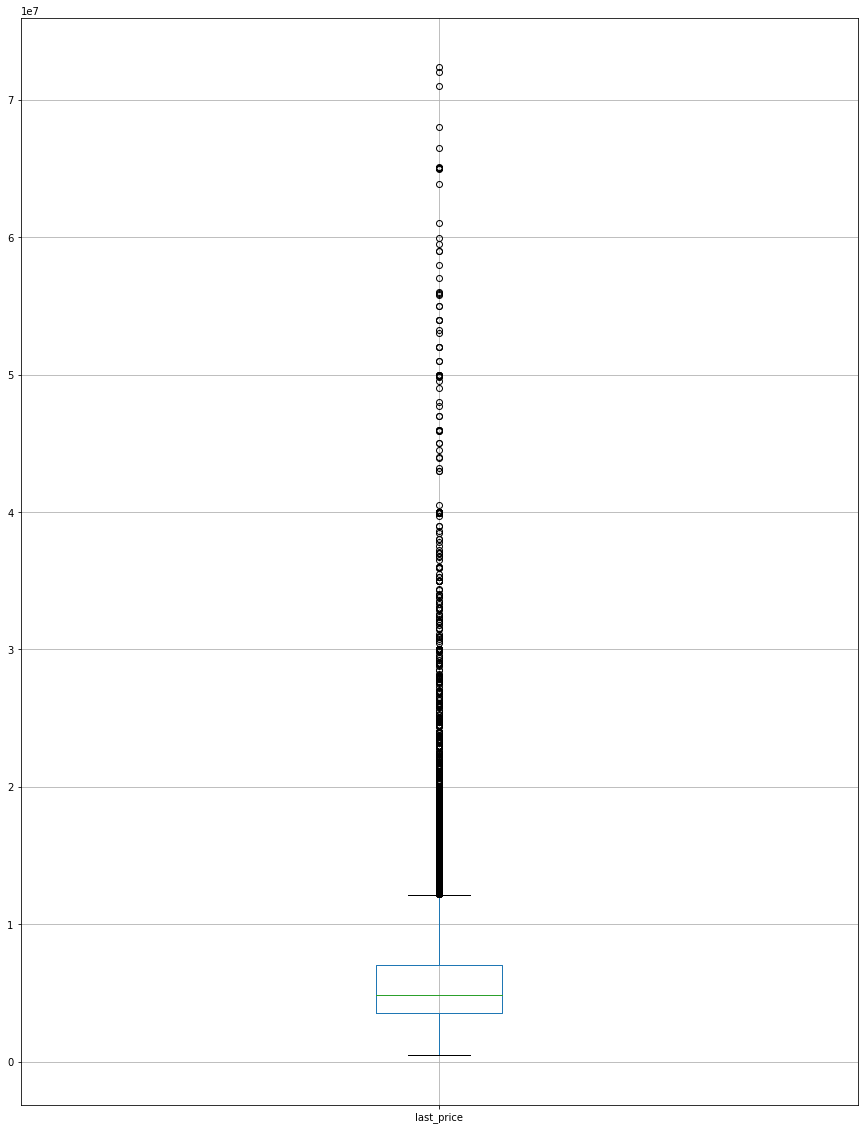

In [165]:
# Проверяю результат на "ящике с усами"

data.boxplot('last_price', figsize=(15,20))

In [166]:
# Проверка количества отброшенных значений.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14405 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14405 non-null  int64         
 1   last_price            14405 non-null  float64       
 2   total_area            14405 non-null  float64       
 3   first_day_exposition  14405 non-null  datetime64[ns]
 4   rooms                 14405 non-null  int64         
 5   ceiling_height        14405 non-null  float64       
 6   floors_total          14396 non-null  float64       
 7   living_area           13617 non-null  float64       
 8   floor                 14405 non-null  int64         
 9   is_apartment          1846 non-null   object        
 10  studio                14405 non-null  bool          
 11  open_plan             14405 non-null  bool          
 12  kitchen_area          13479 non-null  float64       
 13  balcony         

<AxesSubplot:>

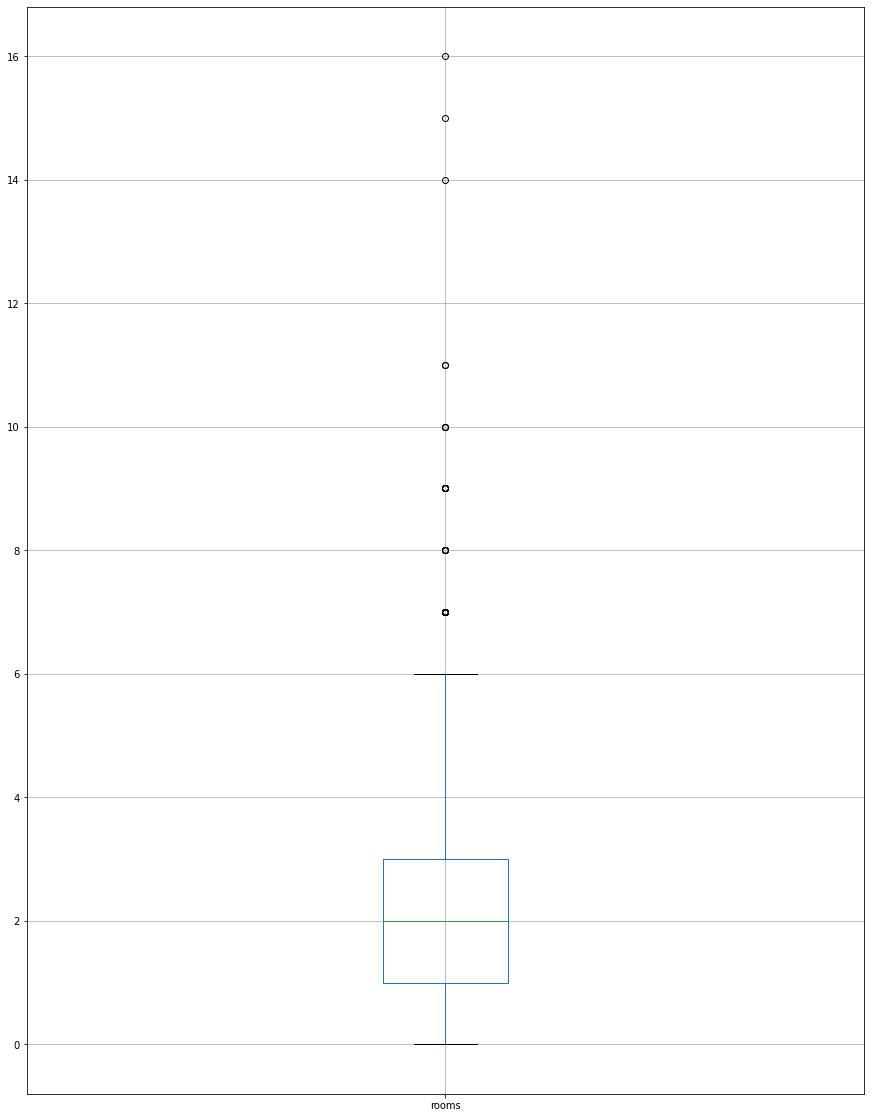

In [167]:
# Строю диаграмму размаха для столбца с числом комнат

data.boxplot('rooms', figsize=(15,20))

In [168]:
# Отсев выбросов из столбца с числом комнат ('rooms')

data = data.query('rooms <= 8 & rooms >= 1')

<AxesSubplot:>

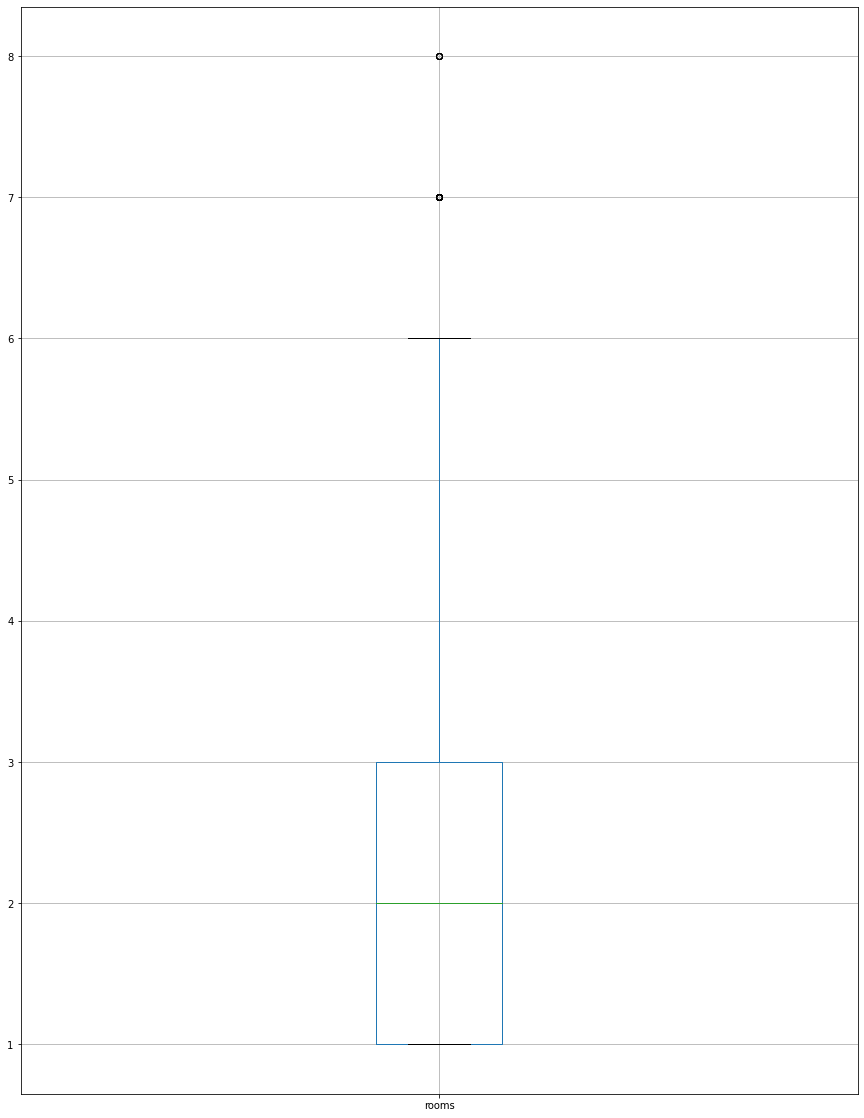

In [169]:
# Проверяю на диаграмме размаха

data.boxplot('rooms', figsize=(15,20))

In [170]:
# Проверка количества отброшенных значений.

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14310 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14310 non-null  int64         
 1   last_price            14310 non-null  float64       
 2   total_area            14310 non-null  float64       
 3   first_day_exposition  14310 non-null  datetime64[ns]
 4   rooms                 14310 non-null  int64         
 5   ceiling_height        14310 non-null  float64       
 6   floors_total          14301 non-null  float64       
 7   living_area           13528 non-null  float64       
 8   floor                 14310 non-null  int64         
 9   is_apartment          1841 non-null   object        
 10  studio                14310 non-null  bool          
 11  open_plan             14310 non-null  bool          
 12  kitchen_area          13466 non-null  float64       
 13  balcony         

In [171]:
# Смотрю значения в стобце с общей площадью (total_area), жилой площадью (living_area) и площадью кухни (kitchen_area)

data.sort_values(by='kitchen_area', ascending=False).head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10.0,95.0,6,NaN,...,77.0,0.0,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
14644,17,47000000.0,150.0,2017-02-28,4,3.70,6.0,58.0,5,NaN,...,75.0,1.0,Санкт-Петербург,16085.0,7616.0,0.0,NaN,0.0,NaN,507.0
22980,19,24500000.0,155.4,2017-10-10,3,3.00,4.0,72.0,2,NaN,...,65.0,0.0,Санкт-Петербург,43758.0,15461.0,1.0,756.0,2.0,278.0,325.0
15780,9,12990000.0,119.6,2017-03-13,3,3.00,5.0,36.4,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,NaN
19499,10,8000000.0,118.0,2017-08-31,3,3.00,5.0,36.0,4,False,...,64.0,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,7.0
19130,11,40000000.0,153.0,2017-09-02,3,3.30,10.0,45.2,7,NaN,...,63.0,2.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,455.0
14900,20,25900000.0,125.6,2018-08-14,2,4.00,4.0,42.7,4,NaN,...,62.5,2.0,Пушкин,13426.0,25580.0,0.0,NaN,0.0,NaN,194.0
13139,20,55000000.0,288.0,2017-11-14,5,3.51,6.0,100.7,2,NaN,...,62.0,0.0,Санкт-Петербург,26228.0,4930.0,2.0,175.0,1.0,682.0,338.0
3561,5,12300000.0,115.0,2017-08-09,3,2.70,20.0,45.0,16,NaN,...,60.0,1.0,Санкт-Петербург,33386.0,14234.0,0.0,NaN,0.0,NaN,63.0
13845,12,65000000.0,250.0,2014-12-09,5,3.10,5.0,167.0,5,NaN,...,60.0,1.0,Санкт-Петербург,23553.0,1862.0,3.0,286.0,3.0,577.0,714.0


In [172]:
# Площадь кухни редко бывает больше жилой площади; площадь кухни и жилая площадь не могут быть больше общей площади ни вместе, ни по-отдельности

data = data.query('kitchen_area < living_area & kitchen_area < total_area & living_area < total_area & total_area > living_area + kitchen_area')

Обработка значений в стобцах номером этажа (floors_total) и количеством этажей в доме (floor):

In [173]:
# Чтобы избежать ошибки NumExprClobberingError придётся изменить название столбца

data.rename(columns={'floor' : 'current_floor'}, inplace=True)

In [174]:
# Номер этажа в доме не должен превышать общее количество этажей в доме

data = data.query('floors_total >= current_floor')

In [175]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12925 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          12925 non-null  int64         
 1   last_price            12925 non-null  float64       
 2   total_area            12925 non-null  float64       
 3   first_day_exposition  12925 non-null  datetime64[ns]
 4   rooms                 12925 non-null  int64         
 5   ceiling_height        12925 non-null  float64       
 6   floors_total          12925 non-null  float64       
 7   living_area           12925 non-null  float64       
 8   current_floor         12925 non-null  int64         
 9   is_apartment          1652 non-null   object        
 10  studio                12925 non-null  bool          
 11  open_plan             12925 non-null  bool          
 12  kitchen_area          12925 non-null  float64       
 13  balcony         

### Добавление в таблицу новых столбцов

In [176]:
# Добавляю столбец с ценой одного квадратного метра (square_meter_price):
    
data['square_meter_price'] = data['last_price'] / data['total_area']

In [177]:
# Добавляю столбец с днём недели, в который объявление было опубликованно (weekday):

data['weekday'] = data['first_day_exposition'].dt.weekday

In [178]:
# Добавляю столбец с месяцем, в который объявление было опубликованно (month):

data['month'] = data['first_day_exposition'].dt.month

In [179]:
# Добавляю столбец с годом, в который объявление было опубликованно (year):

data['year'] = data['first_day_exposition'].dt.year

In [180]:
# Создаю функцию для категоризации этажей

def floor_sorting(row):
    floor = row['current_floor']
    last_floor = row['floors_total']
    if floor == last_floor:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

# Создаю столбец с категориями этажей    

data['floor_type'] = data.apply(floor_sorting, axis=1)

In [181]:
# Заполнил пропуски.

data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

# Перевел метры до центра в километры.

data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000

# Перевел значения в целые числа

data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].astype('int')

In [182]:
print(data.head(20))

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0       108.0           2019-03-07      3   
9             18   5400000.0        61.0           2017-02-26      3   
10             5   5050000.0        39.6           2017-11-16      1   
13            20   3550000.0        42.8           2017-07-01      2   
16            11   6700000.0        82.0           2017-11-23      3   
18             8   3250000.0        31.0           2017-01-27      1   
19            16  14200000.0       121.0           2019-01-09      3   
20            12   6120000.0        80.0           2017-09-28      3   
22            20   5000000.0        58.0           2017-04-24      2   
23            11   2950000.0        32.0           2016-10-29      1   
25             3   6800000.0        76.0           2015-10-01      2   
27            20   7100000.0        70.0           2017-05-12      3   
28             8   4170000.0        44.0           2017-12-13   

### Исследовательский анализ данных

Text(0.5, 1.0, 'Общая площадь в квартирах')

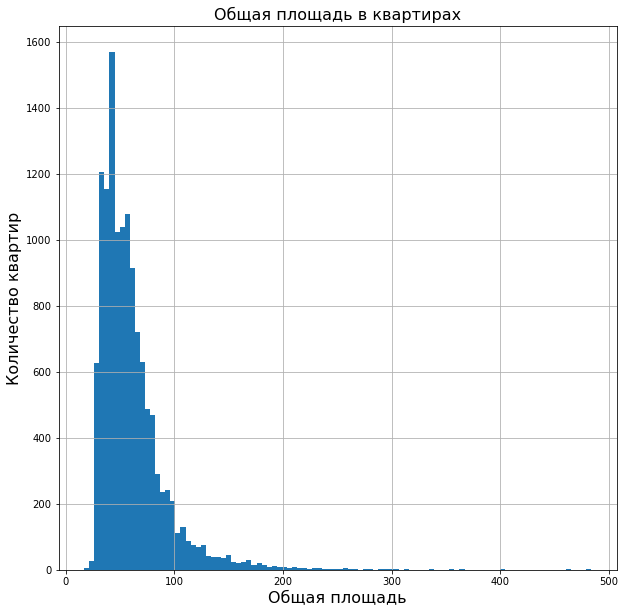

In [252]:
# Строю гистограмму для общей площади

data['total_area'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Общая площадь', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Общая площадь в квартирах', fontsize=16)

In [184]:
data['total_area'].describe()

count    12925.000000
mean        60.826028
std         31.047324
min         17.000000
25%         41.300000
50%         53.600000
75%         71.000000
max        483.900000
Name: total_area, dtype: float64

Большая часть объектов недвижимости по общей площади не превышает 100 кв.м., при этом 75% из этих объектов по общей полощади не превышают и 71 кв.м.

Text(0.5, 1.0, 'Жилая площадь в квартирах')

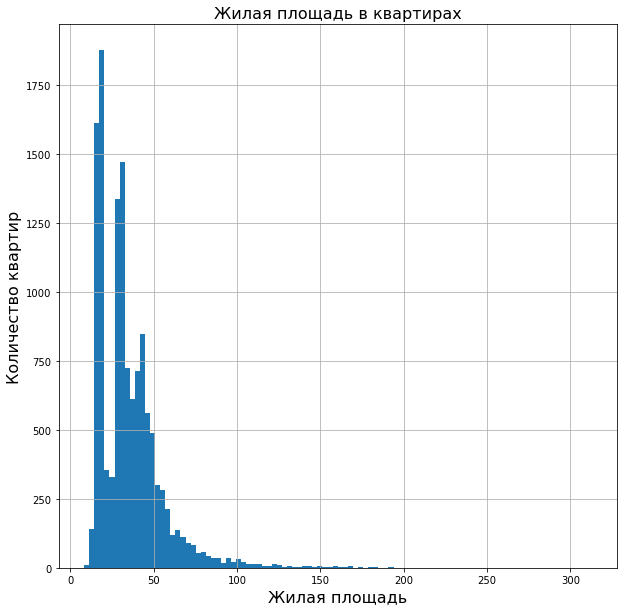

In [251]:
# Строю гистограмму для жилой площади

data['living_area'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Жилая площадь', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Жилая площадь в квартирах', fontsize=16)

In [186]:
data['living_area'].describe()

count    12925.000000
mean        35.364201
std         20.305783
min          8.300000
25%         19.700000
50%         31.000000
75%         43.300000
max        312.500000
Name: living_area, dtype: float64

Большая часть объектов недвижимости по жилой площади не превышает 50 кв.м., при этом 75% из этих объектов по жилой полощади не превышают 43.3 кв.м.

Text(0.5, 1.0, 'Площадь кухни в квартирах')

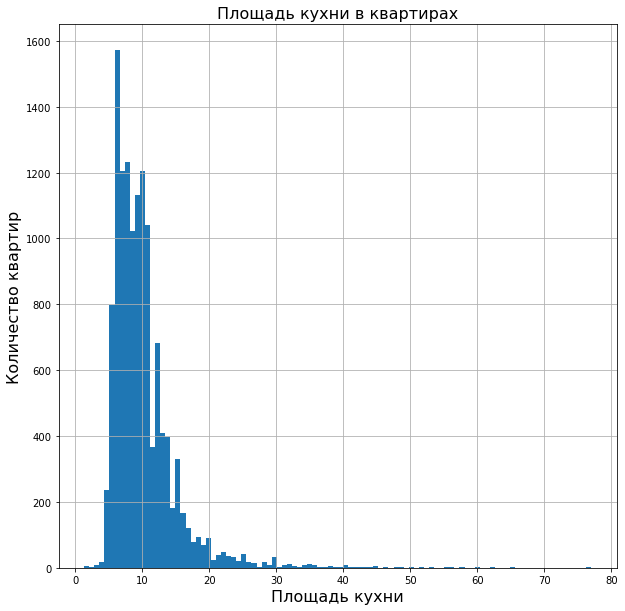

In [250]:
# Строю гистограмму для площади кухни

data['kitchen_area'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Площадь кухни', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Площадь кухни в квартирах', fontsize=16)

In [188]:
data['kitchen_area'].describe()

count    12925.000000
mean        10.102956
std          4.908719
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         77.000000
Name: kitchen_area, dtype: float64

75% объектов недвижимости по площади кухни не превышают 11.5 кв.м.

Text(0.5, 1.0, 'Цена на момент снятия с публикации')

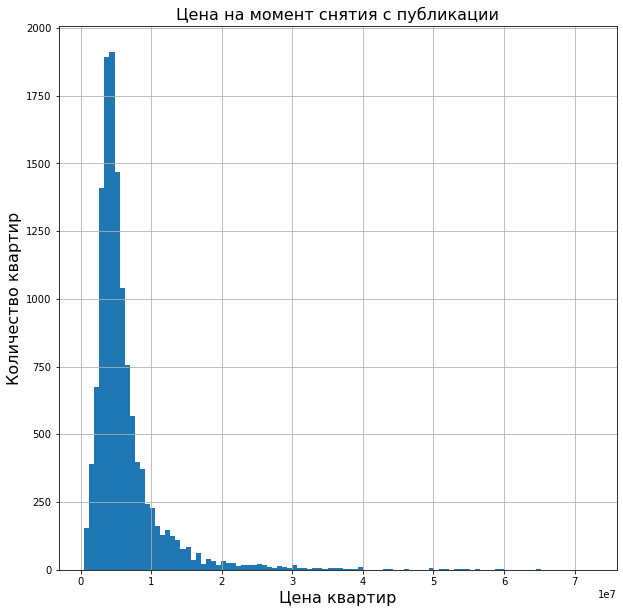

In [248]:
# Строю гистограмму для столбца с ценой

data['last_price'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Цена квартир', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Цена на момент снятия с публикации', fontsize=16)

In [190]:
data['last_price'].describe()

count    1.292500e+04
mean     6.296925e+06
std      5.446441e+06
min      4.900000e+05
25%      3.600000e+06
50%      4.850000e+06
75%      6.950000e+06
max      7.237500e+07
Name: last_price, dtype: float64

75% объектов недвижимости по cтоимости не превышают 6 950 000.

Text(0.5, 1.0, 'Количество комнат в квартирах')

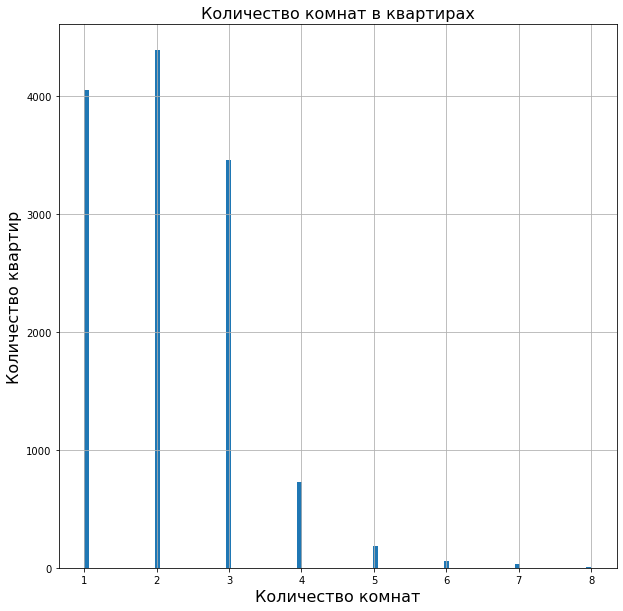

In [249]:
# Изучаю значения в столбце с количеством комнат.

data['rooms'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Количество комнат', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Количество комнат в квартирах', fontsize=16)

In [192]:
data['rooms'].describe()

count    12925.000000
mean         2.144526
std          1.034234
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

75% объектов недвижимости по числу комнат не превышают 3.

Text(0.5, 1.0, 'Высота потолков в квартирах')

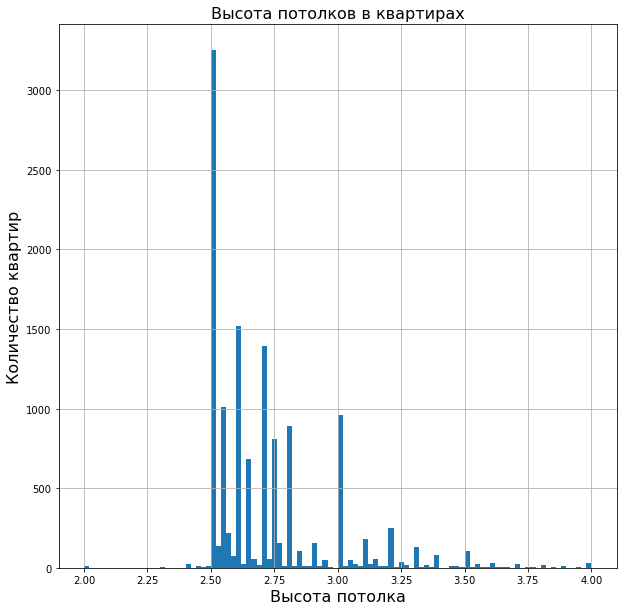

In [254]:
# Изучаю значения в столбце с высотой потолков.

data['ceiling_height'].hist(grid=True, figsize=(10, 10), bins=100)

plt.xlabel('Высота потолка', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Высота потолков в квартирах', fontsize=16)

In [194]:
data['ceiling_height'].describe()

count    12925.000000
mean         2.714318
std          0.253623
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

75% объектов недвижимости по высоте потолков не превышают 2.8 м., 50% не превышают 2.65 м.

Text(0.5, 1.0, 'Распределение квартир по этажам')

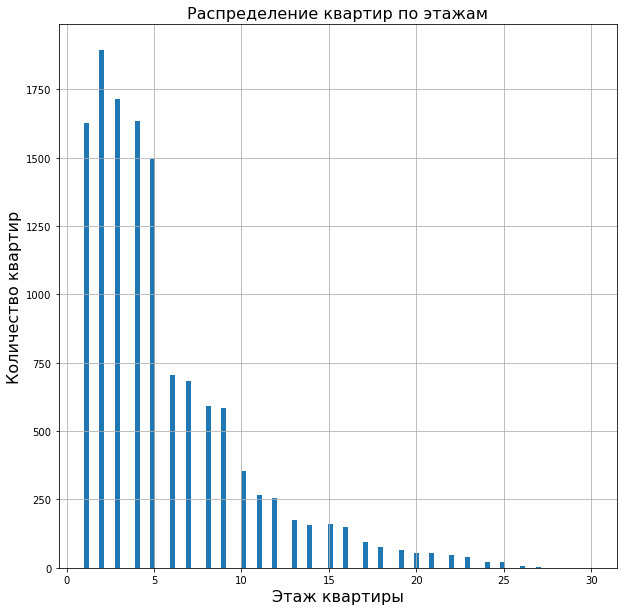

In [258]:
# Изучаю значения в столбце с этажами квартир.

data['current_floor'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Этаж квартиры', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Распределение квартир по этажам', fontsize=16)

In [196]:
data['current_floor'].describe()

count    12925.000000
mean         5.577563
std          4.554321
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: current_floor, dtype: float64

75% объектов недвижимости расположены не выше 7 этажа, 50% - не выше 4.

Text(0.5, 1.0, 'Распределение квартир по категориям этажей')

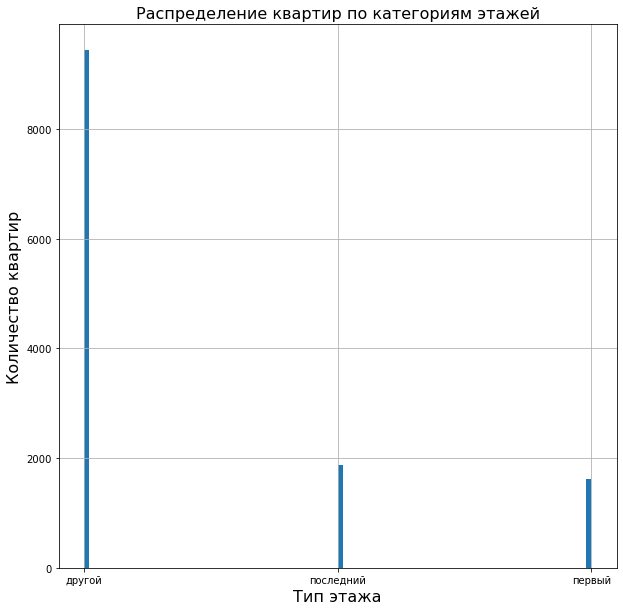

In [260]:
# Изучаю группировку значений по типу с этажей квартир.

data['floor_type'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Тип этажа', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Распределение квартир по категориям этажей', fontsize=16)

In [198]:
# Вычисляю, какую долю составляет каждая группа

print(data.groupby('floor_type')['floor_type'].count())

print()
print('Всего:', data['floor_type'].count())

print()
print('Первый:', 1617 / 12925 * 100)
print('Последний:', 1870 / 12925 * 100)
print('Другой:', 9438 / 12925 * 100)

floor_type
другой       9438
первый       1617
последний    1870
Name: floor_type, dtype: int64

Всего: 12925

Первый: 12.51063829787234
Последний: 14.468085106382977
Другой: 73.02127659574468


73% объектов недвижимости относятся к категории "другой", 12,5% - к категории "первый", 14,4% - к категории "последний".

Text(0.5, 1.0, 'Количество этажей в здании')

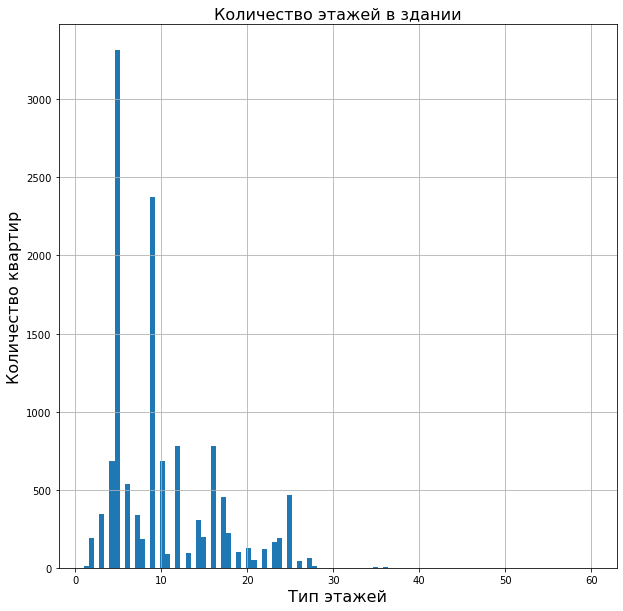

In [262]:
# Изучаю стобец с общим количеством этажей.

data['floors_total'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Тип этажей', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Количество этажей в здании', fontsize=16)

In [200]:
data['floors_total'].describe()

count    12925.000000
mean        10.095783
std          6.116944
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

75% объектов недвижимости расположены в зданиях, насчитывающих не больше 14 этажей, 50% - не больше 9 этажей.

Text(0.5, 1.0, 'Расстояние до центра города')

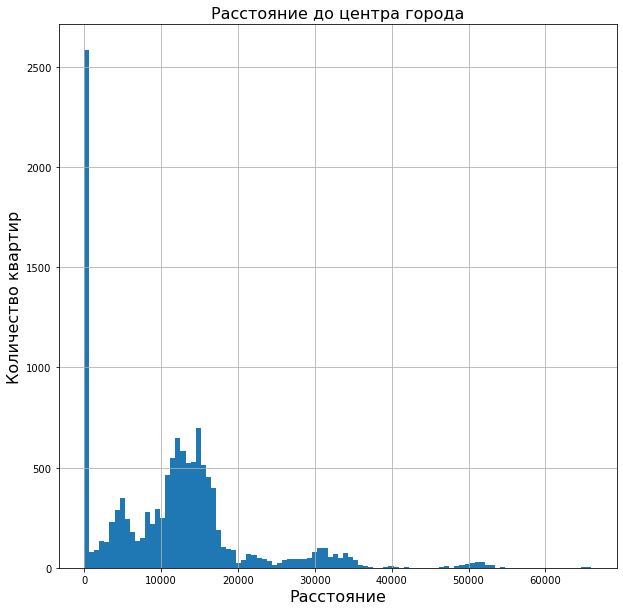

In [263]:
# Изучаю стобец с расстоянием до центра города.

data['cityCenters_nearest'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Расстояние', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Расстояние до центра города', fontsize=16)

In [202]:
data['cityCenters_nearest'].describe()

count    12925.000000
mean     11417.436828
std       9715.759069
min          0.000000
25%       3907.000000
50%      11689.000000
75%      15254.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

75% объектов недвижимости расположены не более чем в 16 077 м. от центра города, 50% - не более чем в 13 052 м. от центра города.

Text(0.5, 1.0, 'Расстояние до аэропорта')

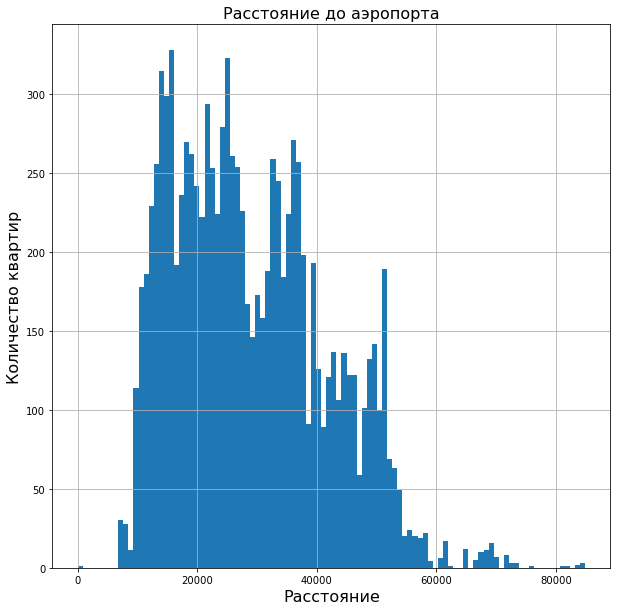

In [264]:
# Изучаю стобец с расстоянием до аэропорта.

data['airports_nearest'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Расстояние', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Расстояние до аэропорта', fontsize=16)

In [204]:
data['airports_nearest'].describe()

count    10346.000000
mean     28879.302146
std      12713.594694
min          0.000000
25%      18453.000000
50%      26794.500000
75%      37153.000000
max      84869.000000
Name: airports_nearest, dtype: float64

75% объектов недвижимости расположены не более чем в 37 153 м. от аэропорта, 50% - не более чем в 26 794 м. от аэропорта.

Text(0.5, 1.0, 'Расстояние до ближайшего парка')

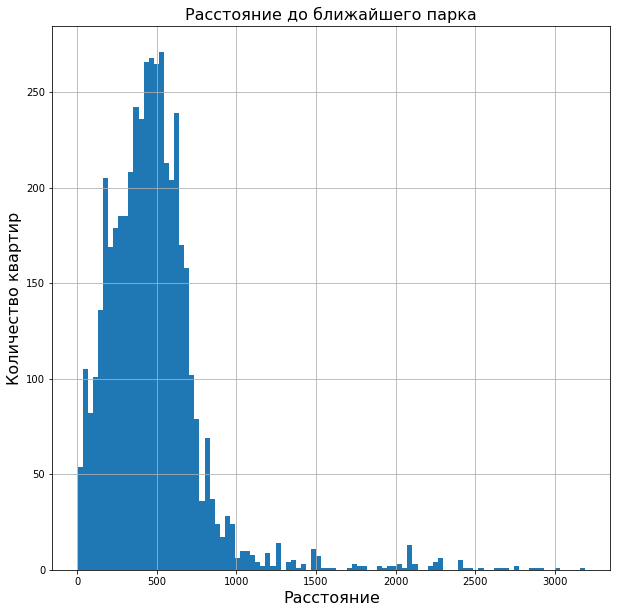

In [266]:
# Изучаю стобец с расстоянием до ближайшего парка.

data['parks_nearest'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Расстояние', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Расстояние до ближайшего парка', fontsize=16)

In [206]:
data['parks_nearest'].describe()

count    4721.000000
mean      476.591612
std       315.403058
min         3.000000
25%       287.000000
50%       451.000000
75%       604.000000
max      3190.000000
Name: parks_nearest, dtype: float64

75% объектов недвижимости расположены не более чем в 604 м. от парка, 50% - не более чем в 451 м. от парка.

weekday
0    2129
1    2341
2    2154
3    2366
4    2062
5    1024
6     849
Name: weekday, dtype: int64
Всего: 12925


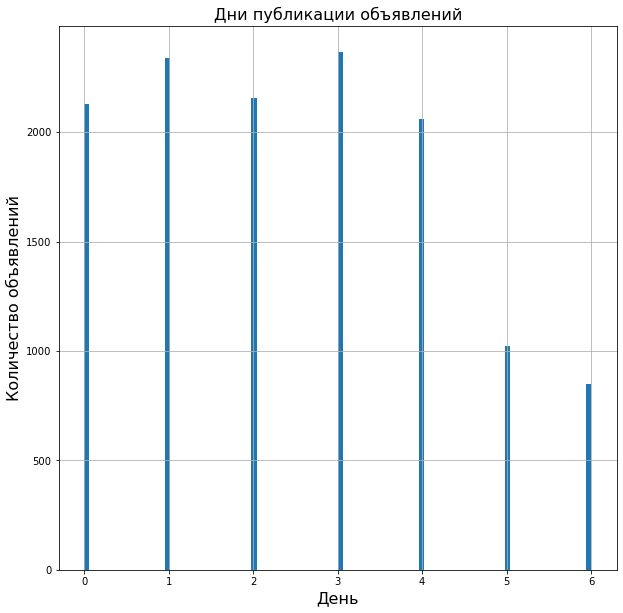

In [269]:
# Изучаю стобец с днём публикации объявлений.

data['weekday'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('День', fontsize=16)
plt.ylabel('Количество объявлений', fontsize=16)
plt.title('Дни публикации объявлений', fontsize=16)

print(data.groupby('weekday')['weekday'].count())
print('Всего:', data['weekday'].count())

По будням объявления публикуют в два раза чаще, чем по выходным. Чаще всего объявления публиковали по вторникам и четвергам.

month
1      788
2     1505
3     1527
4     1314
5      630
6      814
7      920
8      977
9     1105
10    1223
11    1307
12     815
Name: month, dtype: int64
Всего: 12925


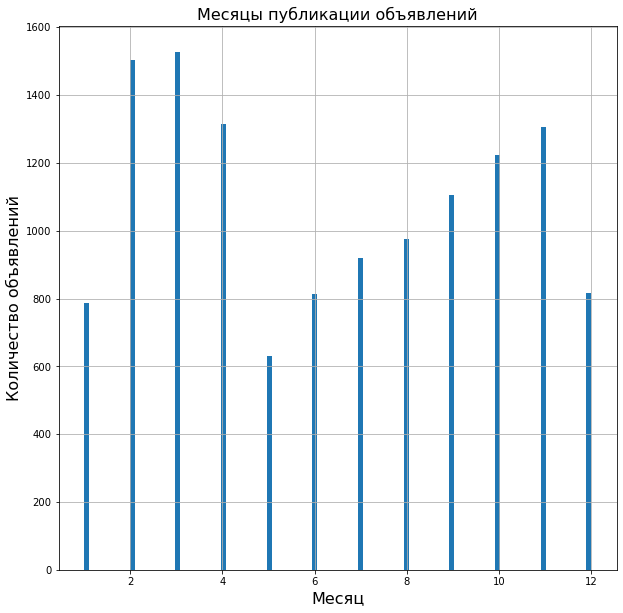

In [270]:
# Изучаю стобец с месяцем публикации объявлений.

data['month'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Месяц', fontsize=16)
plt.ylabel('Количество объявлений', fontsize=16)
plt.title('Месяцы публикации объявлений', fontsize=16)

print(data.groupby('month')['month'].count())
print('Всего:', data['month'].count())

Чаще всего объявления публиковались в феврале и марте, реже всего - в декабре, январе, мае и июне. Спад публикаций объявлений можно заметить с мая по август, то есть в период отпусков, и с декабря по январь - в период отпусков на новогодние праздники. Осенью публикация объявлений наиболее стабильная и высокая.

count    10723.000000
mean       192.057540
std        228.435633
min          1.000000
25%         45.000000
50%        107.000000
75%        250.000000
max       1580.000000
Name: days_exposition, dtype: float64

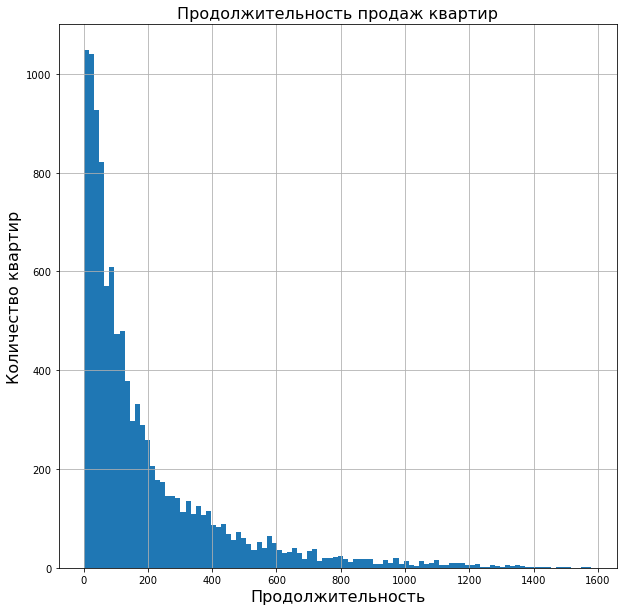

In [272]:
# Изучаю стобец с продолжительностью продаж квартир.

data['days_exposition'].hist(grid=True, figsize=(10,10), bins=100)

plt.xlabel('Продолжительность', fontsize=16)
plt.ylabel('Количество квартир', fontsize=16)
plt.title('Продолжительность продаж квартир', fontsize=16)

data['days_exposition'].describe()

Средняя продолжительность продажи квартир: 192 дня. Медианное значение: 107 дней.

Быстрыми можно считать продажи которые не превышают 250 дней (эту продолжительность не превышают 75% объявлений), необычно долгими - продажи продолжительностью от 600 дней и дольше (здесь количество объявлений значительно падает).

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

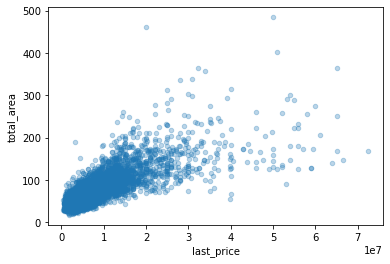

In [210]:
# Корреляция между ценой и общей площадью.
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

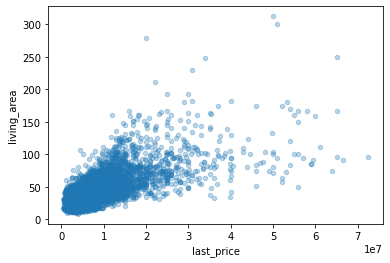

In [211]:
# Корреляция между ценой и жилой площадью.
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

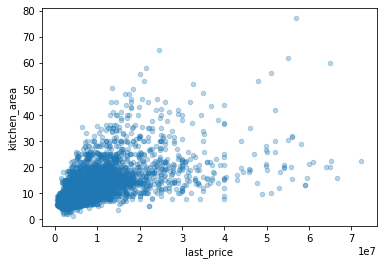

In [212]:
# Корреляция между ценой и площадью кухни.

data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='rooms'>

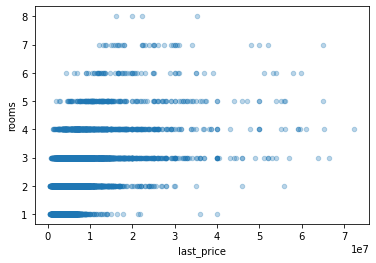

In [213]:
# Корреляция между ценой и количеством комнат.
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='current_floor'>

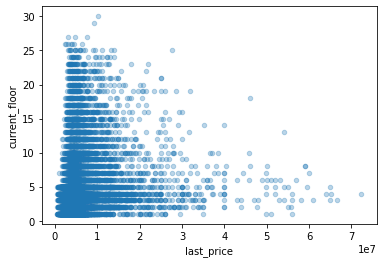

In [215]:
# Корреляция между ценой и этажом, на котором расположена квартира.
data.plot(x='last_price', y='current_floor', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='first_day_exposition'>

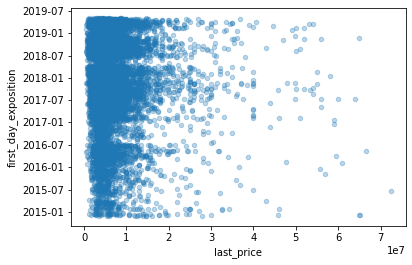

In [216]:
# Корреляция между ценой и датой размещения объявления о продаже квартиры.
data.plot(x='last_price', y='first_day_exposition', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='weekday'>

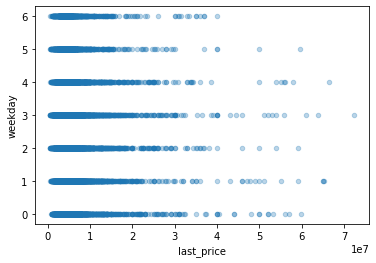

In [217]:
# Корреляция между ценой и днём размещения объявления о продаже квартиры.
data.plot(x='last_price', y='weekday', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='month'>

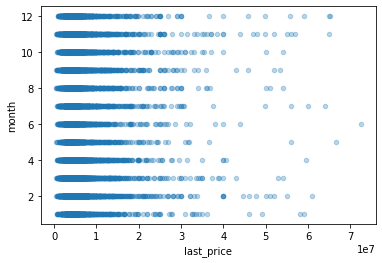

In [218]:
# Корреляция между ценой и месяцем размещения объявления о продаже квартиры.
data.plot(x='last_price', y='month', kind='scatter', alpha=0.3)

<AxesSubplot:xlabel='last_price', ylabel='year'>

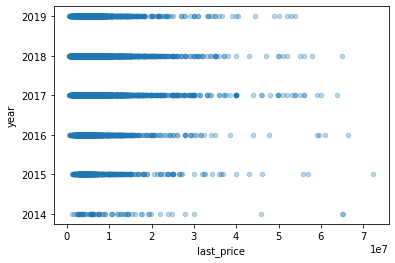

In [219]:
# Корреляция между ценой и годом размещения объявления о продаже квартиры.
data.plot(x='last_price', y='year', kind='scatter', alpha=0.3)

In [220]:
data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,current_floor,studio,open_plan,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,cityCenters_nearest_km
total_images,1.000000,0.141110,0.104123,0.081182,0.030509,0.042993,0.085493,0.050379,NaN,NaN,...,0.015376,0.009601,-0.004678,0.012051,-0.051383,0.140684,-0.009017,-0.001698,0.153353,-0.008592
last_price,0.141110,1.000000,0.784809,0.510918,0.495381,0.055783,0.707219,0.067228,NaN,NaN,...,0.289726,-0.011806,0.278910,-0.133354,0.119845,0.709232,-0.024021,0.006909,-0.061334,-0.083418
total_area,0.104123,0.784809,1.000000,0.790243,0.493829,-0.037021,0.944945,-0.004087,NaN,NaN,...,0.211899,-0.013336,0.194895,-0.120003,0.156500,0.224901,-0.025229,0.012256,-0.106664,-0.111965
rooms,0.081182,0.510918,0.790243,1.000000,0.301809,-0.196289,0.865138,-0.133748,NaN,NaN,...,0.151417,-0.037221,0.118090,-0.078592,0.136793,0.003590,-0.009646,0.005492,-0.064954,-0.086571
ceiling_height,0.030509,0.495381,0.493829,0.301809,1.000000,-0.079269,0.456495,-0.044589,NaN,NaN,...,0.292519,-0.063871,0.262414,-0.144438,0.117787,0.350934,-0.019607,0.001118,-0.104159,-0.193746
floors_total,0.042993,0.055783,-0.037021,-0.196289,-0.079269,1.000000,-0.142990,0.672335,NaN,NaN,...,-0.142540,0.091871,-0.059405,0.069776,-0.054365,0.227524,-0.001263,0.009716,0.001347,0.091088
living_area,0.085493,0.707219,0.944945,0.865138,0.456495,-0.142990,1.000000,-0.084834,NaN,NaN,...,0.216333,-0.039685,0.179426,-0.106032,0.146904,0.149087,-0.020335,0.006461,-0.089697,-0.112346
current_floor,0.050379,0.067228,-0.004087,-0.133748,-0.044589,0.672335,-0.084834,1.000000,NaN,NaN,...,-0.094946,0.066515,-0.034318,0.044010,-0.031316,0.177054,0.005649,0.013124,0.000314,0.050002
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
open_plan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Наибольший коэффициент корреляции существует между ценой и общей площадью, он составляет 0,78 

Коэффициент корреляции между ценой и жилой площадью - 0,71

Коэффициент корреляции между ценой и площадью кухни - 0,61

Коэффициент корреляции между ценой и количеством комнат - 0,51

Корреляции между ценой и этажом или датой публикации нет.

In [221]:
# Делаю сводную таблицу с названиями населенных пунктов и средней ценой одного квадратного метра

local_mean = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean'])

local_mean.columns = ['Количество_объявлений', 'Цена_квадратный_метр']

# print(local_mean['Количество_объявлений'].sort_values(ascending=False).head(10))

local_mean = local_mean[local_mean['Количество_объявлений'] >= 123]

print(local_mean.sort_values(by='Цена_квадратный_метр', ascending=False).head(10))

                   Количество_объявлений  Цена_квадратный_метр
locality_name                                                 
Санкт-Петербург                     9016         112047.918023
Пушкин                               212         103299.627116
Кудрово                              158          96133.856333
посёлок Парголово                    123          90742.605262
Мурино                               189          86686.346144
Петергоф                             136          84417.953855
посёлок Шушары                       197          78974.892716
Колпино                              192          75728.351798
Гатчина                              131          69490.127795
Всеволожск                           243          67373.974135


In [222]:
# Выделяю квартиры в Санкт-Петербурге

data_petersburg = data[data['locality_name'] == 'Санкт-Петербург']

print(data_petersburg.groupby('cityCenters_nearest_km')['last_price'].mean())



cityCenters_nearest_km
0     1.366269e+07
1     1.293190e+07
2     1.242153e+07
3     1.109379e+07
4     1.218833e+07
5     1.235175e+07
6     1.267240e+07
7     1.022190e+07
8     9.071352e+06
9     6.642941e+06
10    6.513879e+06
11    6.002854e+06
12    6.124763e+06
13    6.106605e+06
14    5.733760e+06
15    5.701065e+06
16    5.495669e+06
17    4.873537e+06
18    5.265428e+06
19    4.734298e+06
20    5.745823e+06
21    5.250879e+06
22    5.488139e+06
23    4.332353e+06
24    4.907500e+06
25    4.184421e+06
26    4.062500e+06
27    1.435000e+07
28    5.556667e+06
29    4.525000e+06
Name: last_price, dtype: float64


In [273]:
print('Коэффициент корреляции между ценой квартиры в Санкт-Петербурге и её удалённостью от центра составляет', 
      data_petersburg['last_price'].corr(data_petersburg['cityCenters_nearest_km']))

Коэффициент корреляции между ценой квартиры в Санкт-Петербурге и её удалённостью от центра составляет -0.39370292778495114


Коэффициент корреляции между ценой квартиры в Санкт-Петербурге и её удалённостью от центра составляет -0.3937029277849514. В группировке значений по их удалённости от центра также видно, что чем дальше квартира находится от центра, тем она дешевле, хотя значительно сильнее на цену квартиры влияет её площадь.

### Общий вывод

<b>Были рассмотрены основые праметры квартир (общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления) и выявлены следующие закономерности: </b>

- Большая часть объектов недвижимости по общей полощади не превышает 100 кв.м., при этом 75% из этих объектов по общей полощади не превышают и 71 кв.м.

- Большая часть объектов недвижимости по жилой полощади не превышает 50 кв.м., при этом 75% из этих объектов по жилой полощади не превышают 43.3 кв.м.

- 75% объектов недвижимости по полощади кухни не превышают 11.5 кв.м.

- 75% объектов недвижимости по cтоимости не превышают 6 950 000.

- 75% объектов недвижимости по числу комнат не превышают 3.

- 75% объектов недвижимости по высоте потолков не превышают 2.8 м., 50% не превышают 2.65 м.

- 75% объектов недвижимости расположены не выше 7 этажа, 50% - не выше 4.

- 73% объектов недвижимости расположены не на первом и не на последнем этаже; 12,5% квартир расположены на первом этаже; 14,4% квартир расположены на последнем этаже.

- 75% объектов недвижимости расположены в зданиях, насчитывающих не больше 14 этажей, 50% - не больше 9 этажей.

- 75% объектов недвижимости расположены не более чем в 16 077 м. от центра города, 50% - не более чем в 13 052 м. от центра города.

- 75% объектов недвижимости расположены не более чем в 37 153 м. от аэропорта, 50% - не более чем в 26 794 м. от аэропорта.

- 75% объектов недвижимости расположены не более чем в 604 м. от парка, 50% - не более чем в 451 м. от парка.

- По будням объявления публикуют в два раза чаще, чем по выходным. Чаще всего объявления публиковали по вторникам и четвергам.

- Чаще всего объявления публиковались в феврале и марте, реже всего - в декабре, январе, мае и июне. Спад публикаций объявлений можно заметить с мая по август, то есть в период отпусков, и с декабря по январь - в период отпусков на новогодние праздники. Осенью публикация объявлений наиболее стабильная и высокая.

<b>Была рассмотрена продолжительность продажи квартир:</b>

Средняя продолжительность продажи квартиры: 192 дня. Медианное значение: 107 дней.

Быстрыми можно считать продажи которые не превышают 250 дней (эту продолжительность не превышают 75% объявлений), необычно долгими - продажи продолжительностью от 600 дней и дольше (здесь количество объявлений значительно падает).

<b>Было исследованно какие факторы больше всего влияют на общую (полную) стоимость объекта:</b>

- Наибольший коэффициент корреляции существует между ценой и общей площадью, он составляет 0,78

- Коэффициент корреляции между ценой и жилой площадью - 0,71

- Коэффициент корреляции между ценой и площадью кухни - 0,61

- Коэффициент корреляции между ценой и количеством комнат - 0,51

- Корреляции между ценой и этажом или датой публикации нет.

<b> Было посчитано, в каких населенных пунктах (из десятки с самым высоким числом публикаций объявлений) самая высокая и самая низкая средняя стоимость квадратного метра: </b>

- Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге - 112 048 р.

- Самая низкая средняя стоимость квадратного метра во Всеволожске - 67 374 р.

<b> Было проанализированно, как на стоимость квартир влияет их удалённость от центра:</b>

Коэффициент корреляции между ценой квартиры в Санкт-Петербурге и её удалённостью от центра составляет -0.4. 

В группировке значений по их удалённости от центра также видно, что чем дальше квартира находится от центра, тем она дешевле, хотя значительно сильнее на цену квартиры в Санкт-Петербурге влияет её площадь.